In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from random import random
import seaborn as sns
import numpy as np

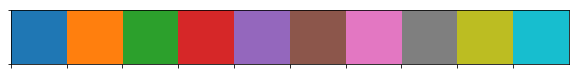

In [2]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

### Function definitions here: 

In [14]:
def discretize_q_values(row, col_q_val):
    q_val = row[col_q_val]
    if q_val < 0.01:
        q_val_d = 3
    elif q_val < 0.05:
        q_val_d = 2
    else:
        q_val_d = 1
    return q_val_d



def unknown_essential_xy(col_screen, df_qval, df_uk, rand_param = 0.85):

    # col_screen = 'zhang_wt_mouse_d45_vs_zhang_input_library'
    df_qval_screen = df_qval[['Rv_ID', col_screen]].copy()

    # Discretize q-values: 
    df_qval_screen['q_val_D'] = df_qval_screen.apply(discretize_q_values, 1, args=[col_screen])

    # Merge with unknowns: 
    df_vis = df_qval_screen.merge(df_uk, on = ['Rv_ID'], how = 'inner')

    # Get x-y datasets: 
    rv_ids = df_vis.Rv_ID.values
    uk_list = np.array(df_vis.UK_score_4)
    q_list = np.array(df_vis.q_val_D)

    # randomize: 
    uk_rd = np.array([uk + rand_param*random()-rand_param/2 for uk in uk_list])
    q_rd = np.array([q + rand_param*random()-rand_param/2 for q in q_list])

    # color the unknown-essentials differently: 
    current_palette = sns.color_palette()
    # all genes are gray by default. 
    color_list = np.array([(0.85,0.85,0.85)]*df_vis.shape[0])
    # Unknown essentials in a different color. 
#     ind_temp = list(df_vis[(df_vis.q_val_D >= 2) & (df_vis.UK_score_4 >= 3)].index)
#     color_list[ind_temp] = current_palette[1]
    
    ind_temp = list(df_vis[(df_vis.q_val_D == 3) & (df_vis.UK_score_4 == 4)].index)
    color_list[ind_temp] = current_palette[0]
    
    return uk_rd, q_rd, color_list, rv_ids, ind_temp

### Load annotation score data: 

In [4]:
file_uk = '../../data/annotations/unknown_essentials/unknown_ALL_levels_essential_scores.csv'
df_uk = pd.read_csv(file_uk)
df_uk = df_uk[['Rv_ID', 'gene_name', 'UK_score_4']]
df_uk.head()

,Rv_ID,gene_name,UK_score_4
0,Rv0001,dnaA,0.0
1,Rv3582c,ispD,1.0
2,Rv0510,hemC,0.0
3,Rv0509,hemA,0.0
4,Rv0500,proC,0.0


### Load log2FC and q-value dataset: 

In [5]:
file_log2FC = '../../data/standardized_data/result_logfc_matrix_2020_08_27.csv'
df_log2FC = pd.read_csv(file_log2FC)

file_qval = '../../data/standardized_data/result_qval_matrix_2020_08_27.csv'
df_qval = pd.read_csv(file_qval)

### Unit test for a single TnSeq screen: 

In [16]:
col_screen = 'marP_KO_vs_marP_WT'
uk_rd, q_rd, color_list, rv_ids, ind_temp = unknown_essential_xy(col_screen, df_qval, df_uk, rand_param = 0.85)
len(ind_temp)

47

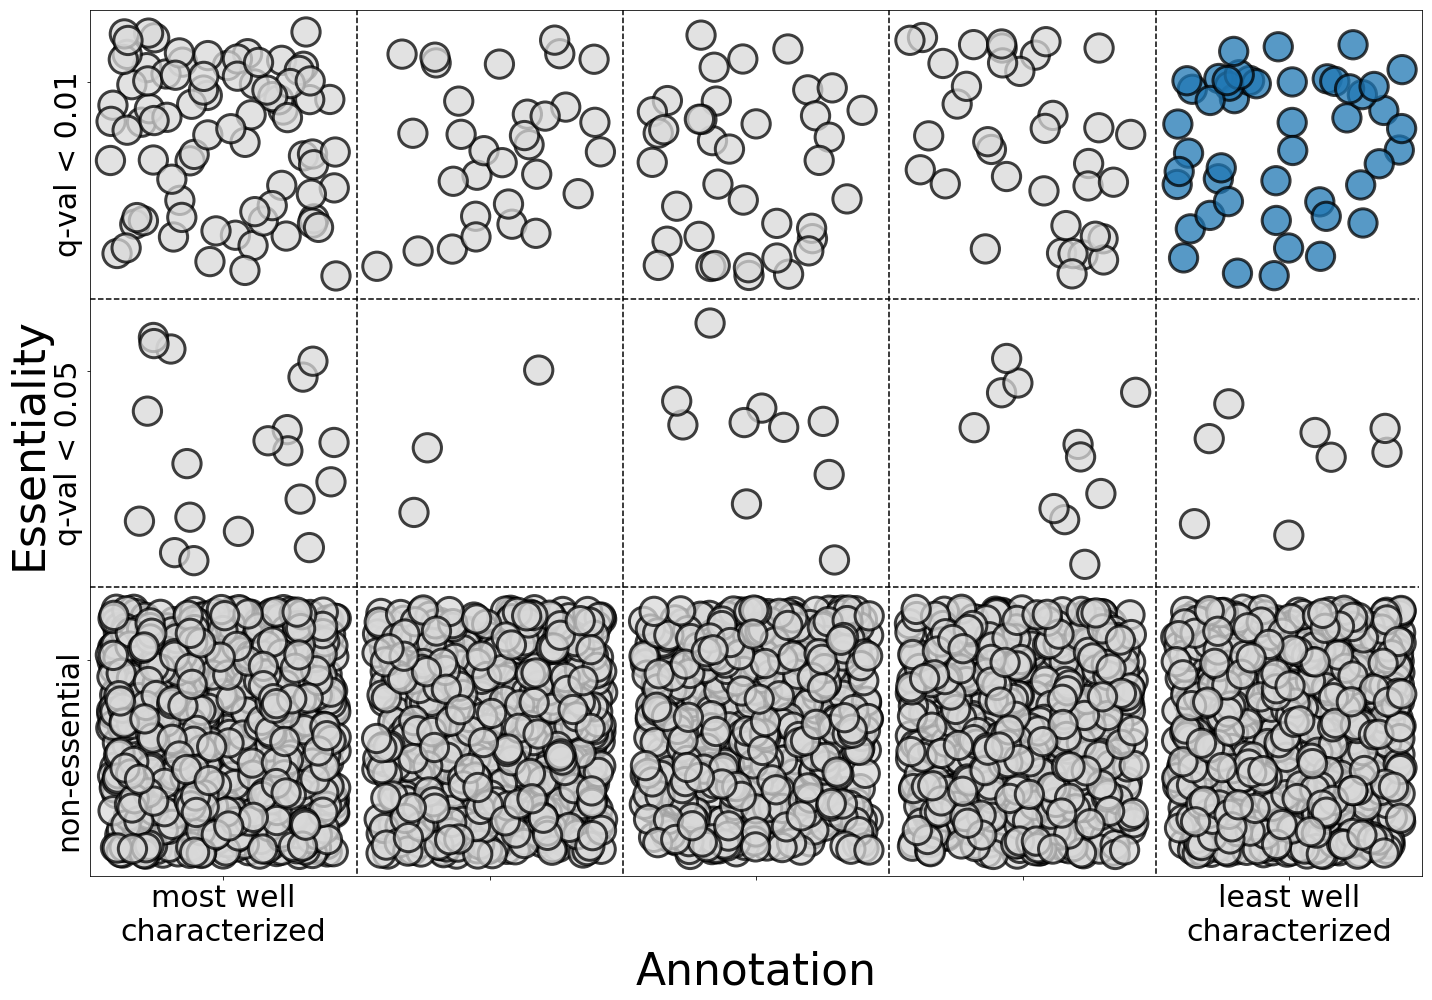

In [18]:
plt.figure(figsize = (20,14))
plt.scatter(uk_rd, q_rd, s = 800, edgecolors='k', alpha = 0.75, color = color_list, linewidths=3)
plt.xlabel('Annotation', fontsize = 44)
plt.ylabel('Essentiality', fontsize = 44)
plt.xticks([0, 1, 2, 3, 4], ['most well\ncharacterized','' , '', '', 'least well\ncharacterized'], fontsize = 30)
plt.yticks([1.25, 2.25, 3.25], ['non-essential' ,'q-val < 0.05', 'q-val < 0.01'], fontsize = 30, rotation = 90)

for x in np.arange(0.5, 4.5, 1):
    yvals = np.arange(0, 4, 0.01)
    xvals = len(yvals)*[x]
    plt.plot(xvals, yvals, '--', color = "k")
    
for y in np.arange(1.5, 3.5, 1):
    xvals = np.arange(-0.5, 4.5, 0.01)
    yvals = len(xvals)*[y]
    plt.plot(xvals, yvals, '--', color = "k")
    
plt.xlim(-0.5, 4.5)
plt.ylim(0.5, 3.5)

plt.tight_layout()

file_fig = '../../figures/genome_visualizations/unknown_essentials_090720.png'
plt.savefig(file_fig, dpi = 200)

## For every screen, count the number of unknown essentials:  

In [19]:
list_num_uk_ES = []
for col_screen in df_qval.columns[1:]:
    uk_rd, q_rd, color_list, rv_ids, ind_temp = unknown_essential_xy(col_screen, df_qval, df_uk, rand_param = 0.85)
    list_num_uk_ES.append(len(ind_temp))
df_num_uk_ES = pd.DataFrame()
df_num_uk_ES['screen'] = df_qval.columns[1:]
df_num_uk_ES['num_unknown_ES'] = list_num_uk_ES

In [20]:
df_num_uk_ES.sort_values(by = 'num_unknown_ES', ascending = False, inplace = True)

In [41]:
df_num_uk_ES.head(15)

,screen,num_unknown_ES
39,marP_KO_vs_marP_WT,47
23,dejesus_Rv1432_day0_vs_dejesus_H37Rv_day0,43
46,ritterhaus_hypoxia_H6_vs_ritterhaus_hypoxia_input,39
21,dejesus_H37Rv_day32_vs_dejesus_H37Rv_day0,33
63,zhang_wt_mouse_d45_vs_zhang_input_library,24
49,xu_inh_025_vs_xu_inh_0,23
26,dejesus_Rv1565c_day0_vs_dejesus_H37Rv_day0,21
27,dejesus_Rv1565c_day32_vs_dejesus_H37Rv_day32,19
53,xu_van_16_vs_xu_van_0,15
48,xu_emb_3_vs_xu_emb_0,14


Text(0, 0.5, 'number of screens')

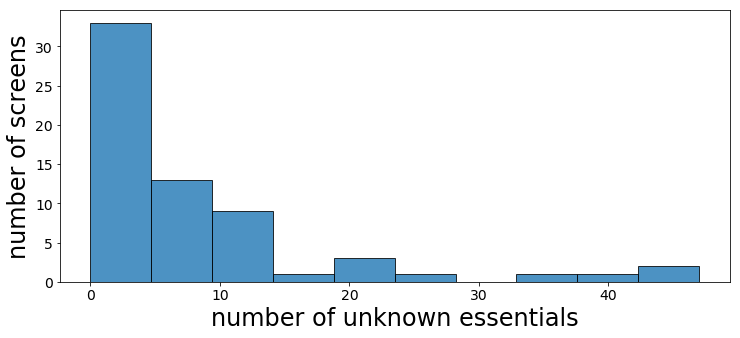

In [40]:
plt.figure(figsize=(12,5))
hst=plt.hist(df_num_uk_ES.num_unknown_ES, color = current_palette[0], edgecolor='k', alpha = 0.8)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('number of unknown essentials', fontsize = 24)
plt.ylabel('number of screens', fontsize = 24)